In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Import python lib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

In [8]:
# Bar chart for categorical features
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

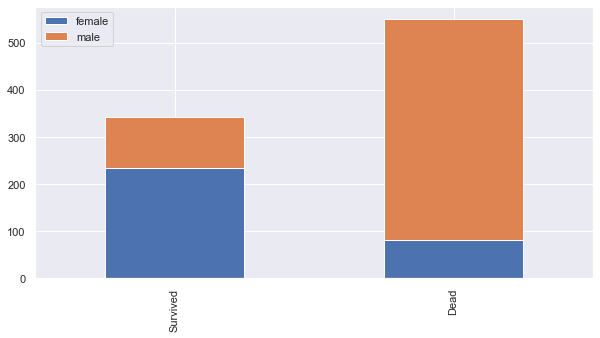

In [9]:
# The chart confirms Women more likely survived than Men
bar_chart('Sex')

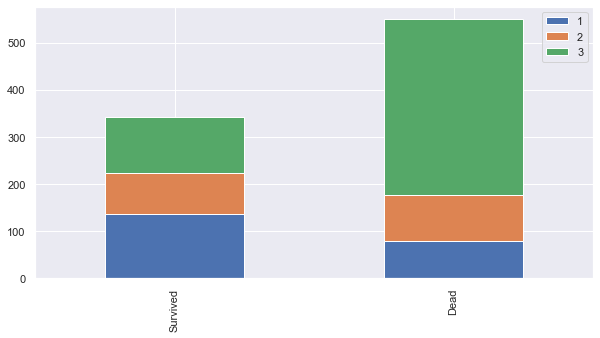

In [10]:
# The chart confirms 1st class more likely survivied than other classes
# The chart confirms 3rd class more likely dead than other classes
bar_chart('Pclass')

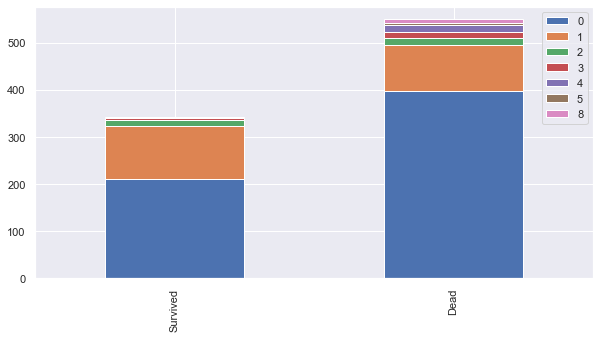

In [11]:
# The chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
# The chart confirms a person aboarded without siblings or spouse more likely dead
bar_chart('SibSp')

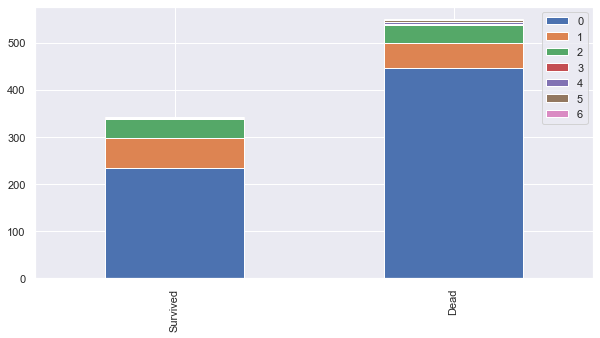

In [12]:
# The chart confirms a person aboarded with more than 2 parents or children more likely survived
# The chart confirms a person aboarded alone more likely dead
bar_chart('Parch')

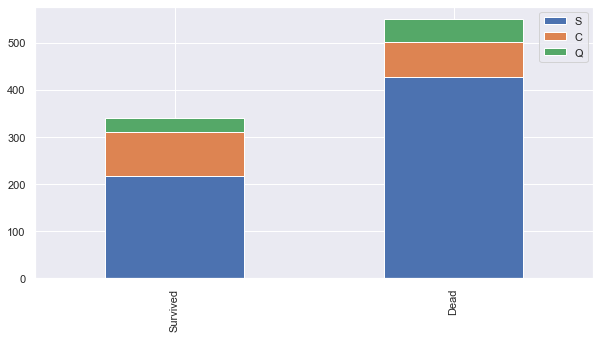

In [13]:
# The chart confirms a person aboarded from C slightly more likely survived
# The chart confirms a person aboarded from Q more likely dead
# The chart confirms a person aboarded from S more likely dead
bar_chart('Embarked')

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersen-Jensen, Miss. Carla Christine Nielsine",male,1601,G6,S
freq,1,577,7,4,644


In [16]:
# Analyze by pivoting features
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


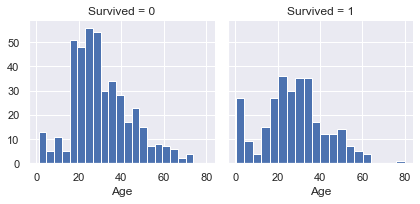

In [20]:
# Analyze by bisualizing data
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

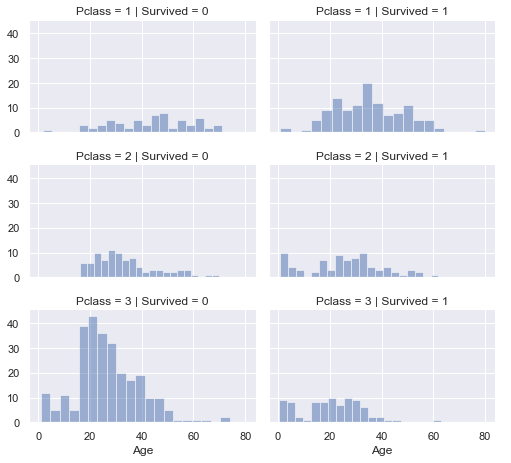

In [21]:
# Correlating numberical and ordinal features
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\users\xp508\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


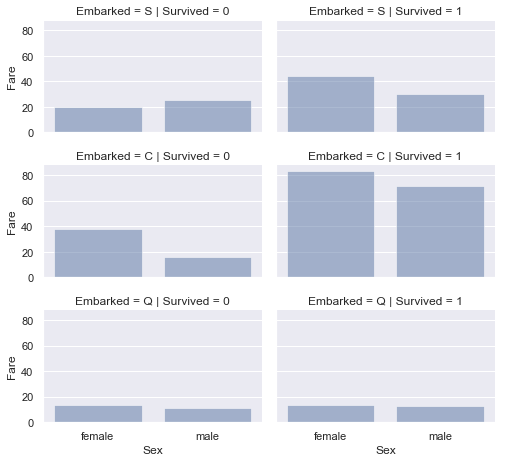

In [22]:
# Correlating categorical and numerical features
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# Converting Sex feature to a new feature called Gender where female=1 and male=0
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# For Age, filled the NaN with median age
train["Age"] = train["Age"].fillna(train["Age"].median())

In [27]:
# Find the most common occurance of Embarked
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [28]:
# Fill the missing values with the most common occurrences
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [29]:
# Re-checking NaNs
feat_list = list(train.columns.values)

for feat in feat_list:
    print(feat,": ",sum(pd.isnull(train[feat])))

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  0


In [30]:
# Find the most common occurance of Fare
freq_fare = train.Fare.dropna().mode()[0]
freq_fare

8.05

In [31]:
# Fill the missing values with the most common occurrences
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(freq_fare)

In [32]:
# Create the FareBand
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [33]:
# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,1,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,3,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,2,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,1,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,2,NaN,C


In [34]:
 test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,0,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,0,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,1,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,1,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,1,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,1,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,0,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,2,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,0,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,2,NaN,S


In [35]:
train = train.drop(['Ticket','Cabin','PassengerId','Name'], axis=1)

In [36]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,0,S
1,1,1,1,38.0,1,0,3,C
2,1,3,1,26.0,0,0,1,S
3,1,1,1,35.0,1,0,3,S
4,0,3,0,35.0,0,0,1,S
5,0,3,0,28.0,0,0,1,Q
6,0,1,0,54.0,0,0,3,S
7,0,3,0,2.0,3,1,2,S
8,1,3,1,27.0,0,2,1,S
9,1,2,1,14.0,1,0,2,C


In [37]:
test = test.drop(['Ticket','Cabin','Name'], axis=1)

In [38]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,0,Q
1,893,3,1,47.0,1,0,0,S
2,894,2,0,62.0,0,0,1,Q
3,895,3,0,27.0,0,0,1,S
4,896,3,1,22.0,1,1,1,S
5,897,3,0,14.0,0,0,1,S
6,898,3,1,30.0,0,0,0,Q
7,899,2,0,26.0,1,1,2,S
8,900,3,1,18.0,0,0,0,C
9,901,3,0,21.0,2,0,2,S


In [39]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [40]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,0,0
1,1,1,1,38.0,1,0,3,1
2,1,3,1,26.0,0,0,1,0
3,1,1,1,35.0,1,0,3,0
4,0,3,0,35.0,0,0,1,0
5,0,3,0,28.0,0,0,1,2
6,0,1,0,54.0,0,0,3,0
7,0,3,0,2.0,3,1,2,0
8,1,3,1,27.0,0,2,1,0
9,1,2,1,14.0,1,0,2,1


In [41]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [42]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,0,2
1,893,3,1,47.0,1,0,0,0
2,894,2,0,62.0,0,0,1,2
3,895,3,0,27.0,0,0,1,0
4,896,3,1,22.0,1,1,1,0
5,897,3,0,14.0,0,0,1,0
6,898,3,1,30.0,0,0,0,2
7,899,2,0,26.0,1,1,2,0
8,900,3,1,18.0,0,0,0,1
9,901,3,0,21.0,2,0,2,0


In [43]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


c:\users\xp508\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


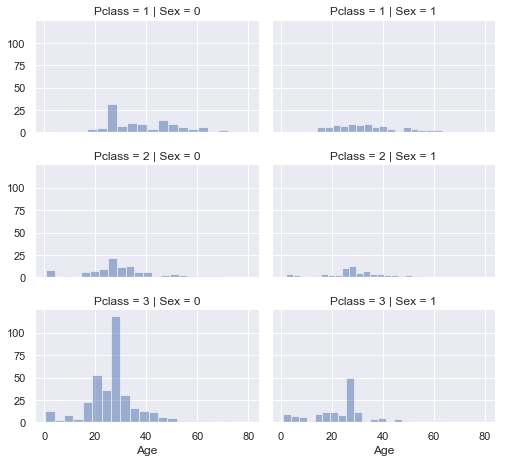

In [44]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [45]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
combine = [train, test]
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,0,0,"(16.336, 32.252]"
1,1,1,1,38,1,0,3,1,"(32.252, 48.168]"
2,1,3,1,26,0,0,1,0,"(16.336, 32.252]"
3,1,1,1,35,1,0,3,0,"(32.252, 48.168]"
4,0,3,0,35,0,0,1,0,"(32.252, 48.168]"


In [47]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [48]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1,1,0,0,0,"(16.0, 32.0]"
1,1,1,1,2,1,0,3,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,1,0,"(16.0, 32.0]"
3,1,1,1,2,1,0,3,0,"(32.0, 48.0]"
4,0,3,0,2,0,0,1,0,"(32.0, 48.0]"


In [49]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


In [50]:
combine = [train, test]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [51]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [52]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

In [53]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [54]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,0
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0


In [55]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1


In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

In [58]:
# decision tree Score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

train_data = train.drop('Survived', axis=1)
target = train['Survived']

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold, n_jobs=1,scoring=scoring)
print(score)

[0.82122905 0.78651685 0.8258427  0.80898876 0.79213483]


In [59]:
# decision tree Score
round(np.mean(score)*100, 2)

80.69

In [60]:
# Random Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.80446927 0.78651685 0.79775281 0.78089888 0.79775281]


In [61]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.35

In [62]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split


In [63]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,feature_names=feature_name,class_names=target_name,filled=True,rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [64]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [65]:
clf

DecisionTreeClassifier()

In [66]:
train_cols = train.columns[0:len(train.columns)-1]

In [67]:
target_cols = train.columns[-1]

In [68]:
# Fit the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

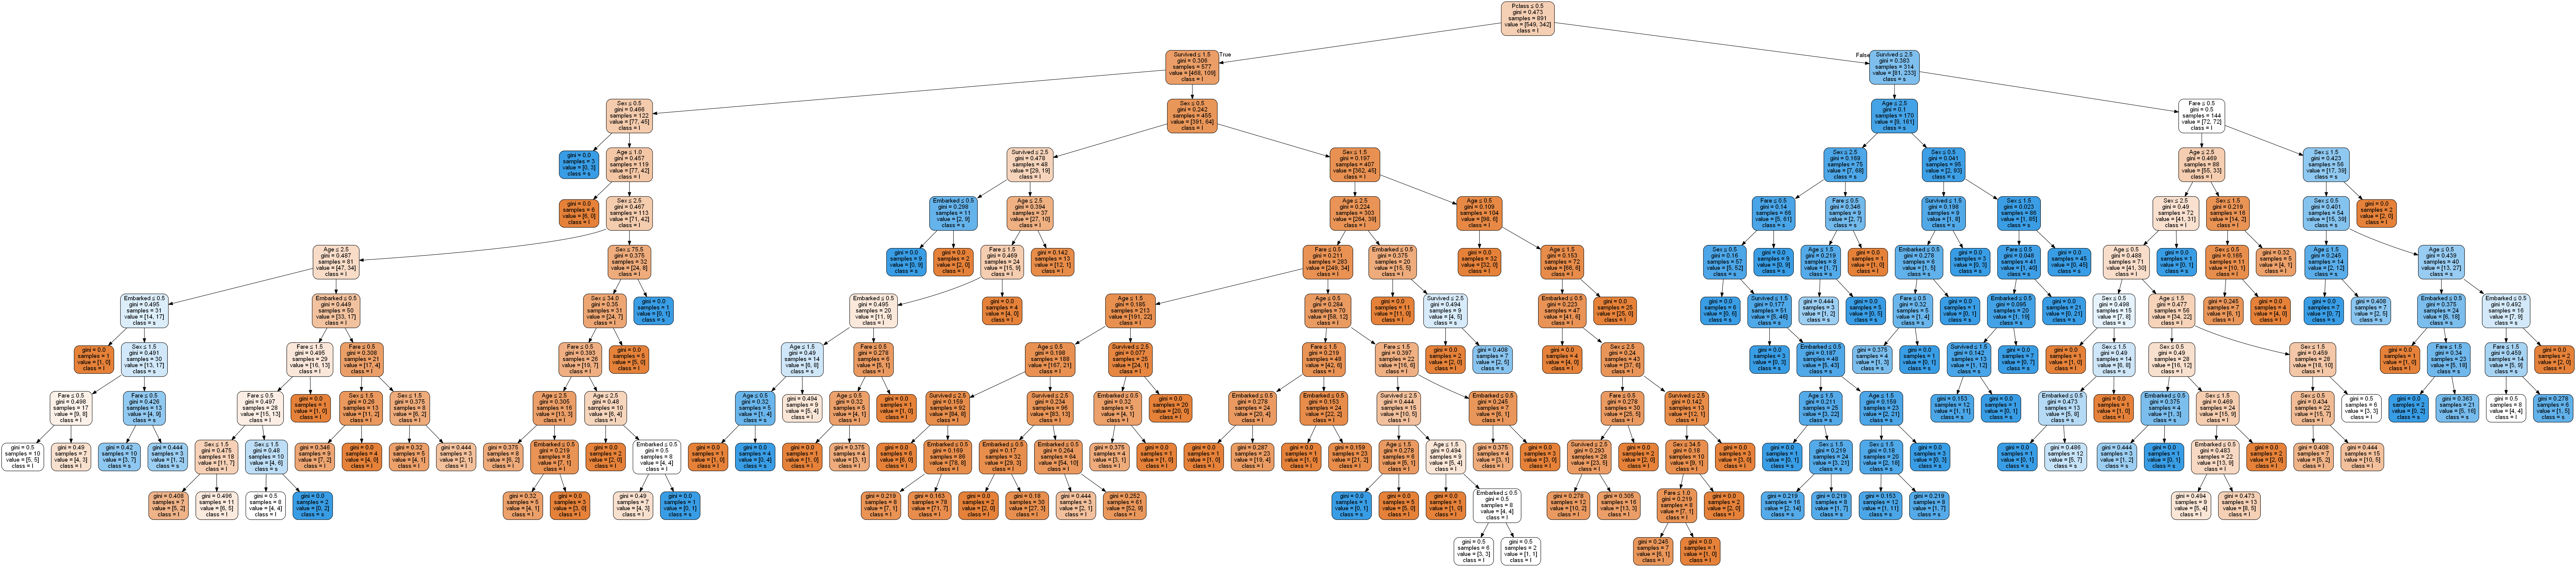

In [69]:
plot_decision_tree(clf,train_cols,target_cols)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1


In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,0
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0


In [80]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [84]:
gnb = GaussianNB()

In [85]:
gnb.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [87]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7687


In [88]:
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model recall score: 0.8100


In [89]:
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred)))

Model precision score: 0.6532


In [90]:
F1 = 2*(recall_score(y_test, y_pred) * precision_score(y_test, y_pred)) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred))
print('Model F1 score: {0:0.4f}'. format(F1))

Model F1 score: 0.7232


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [103]:
X_train.shape

(623, 6)

In [118]:
k_range = range(1,100)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,y_pred))
print(accuracy_scores)

[0.7835820895522388, 0.8022388059701493, 0.8134328358208955, 0.8059701492537313, 0.7910447761194029, 0.7798507462686567, 0.7723880597014925, 0.7798507462686567, 0.7761194029850746, 0.7835820895522388, 0.7723880597014925, 0.8022388059701493, 0.8022388059701493, 0.7835820895522388, 0.7686567164179104, 0.7947761194029851, 0.7873134328358209, 0.7723880597014925, 0.7686567164179104, 0.7723880597014925, 0.7910447761194029, 0.7835820895522388, 0.7835820895522388, 0.7835820895522388, 0.7835820895522388, 0.7985074626865671, 0.7947761194029851, 0.7947761194029851, 0.7910447761194029, 0.7947761194029851, 0.7947761194029851, 0.7985074626865671, 0.7798507462686567, 0.7910447761194029, 0.7910447761194029, 0.7723880597014925, 0.7910447761194029, 0.7910447761194029, 0.7835820895522388, 0.7761194029850746, 0.7798507462686567, 0.7761194029850746, 0.7910447761194029, 0.7798507462686567, 0.7873134328358209, 0.7985074626865671, 0.7910447761194029, 0.7910447761194029, 0.8022388059701493, 0.8022388059701493,

Text(0, 0.5, 'Accuracy')

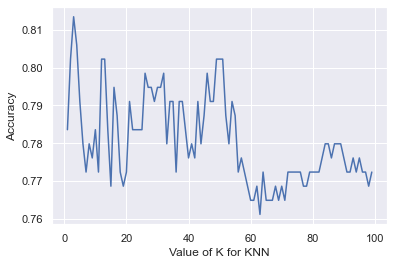

In [116]:
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')